In [14]:
import pandas as pd
import numpy as np

In [15]:
# Caminho para o arquivo CSV
caminho = r'D:\Faculdade\click_predict\data\df_curado.csv'

# Leitura do arquivo CSV
df = pd.read_csv(caminho)

# Conta a quantidade de linhas e colunas
print(f'Quantidade de linhas: {df.shape[0]}')
print(f'Quantidade de colunas: {df.shape[1]}')

Quantidade de linhas: 1741344
Quantidade de colunas: 17


In [16]:
df.columns

Index(['purchase_datetime', 'order_id', 'client_id', 'purchase_weekday_flag',
       'purchase_time_period', 'first_purchase_flag', 'purchase_type',
       'tickets_quantity', 'total_value', 'trip_type', 'no_return_flag',
       'origin_departure', 'destination_departure', 'origin_return',
       'destination_return', 'bus_company_departure', 'bus_company_return'],
      dtype='object')

In [18]:
df = df[pd.to_datetime(df['purchase_datetime']).dt.year >= 2023]

In [19]:
df.dtypes

purchase_datetime         object
order_id                  object
client_id                 object
purchase_weekday_flag       bool
purchase_time_period      object
first_purchase_flag         bool
purchase_type             object
tickets_quantity           int64
total_value              float64
trip_type                 object
no_return_flag              bool
origin_departure          object
destination_departure     object
origin_return             object
destination_return        object
bus_company_departure     object
bus_company_return        object
dtype: object

In [21]:
df.head()

,purchase_datetime,order_id,client_id,purchase_weekday_flag,purchase_time_period,first_purchase_flag,purchase_type,tickets_quantity,total_value,trip_type,no_return_flag,origin_departure,destination_departure,origin_return,destination_return,bus_company_departure,bus_company_return
21,2024-03-28 21:28:04,431ef2295f42b234a1da5c389a33c30a4c00507e369fec...,7eea672ebaaf902ff8a3d236ab05ad9848d07d3ffe57fa...,True,noite,False,individual,1,64.65,ida,True,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,7688b6ef52555962d008fff894223582c484517cea7da4...,NaN,NaN,b4bbe448fde336bb6a7d7d765f36d3327c772b845e7b54...,NaN
37,2023-01-20 19:00:32,5f9d76ff2483cafb4a5fe0b925261b8356ba5110fbb691...,539a2f1c669445e2a6c090c687091aad579c3df033eacb...,True,noite,False,individual,1,76.70,ida,True,274dfec6e079fb08d6b5771537c54d3f0bd36c64c3d8ed...,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,NaN,NaN,8527a891e224136950ff32ca212b45bc93f69fbb801c3b...,NaN
41,2024-01-01 11:44:48,12ac5f0a9305f27f43165cbd9fe2ad865894ef7b74eca0...,a0cacafab0f400307ff038dc9d28768b5262ef40db2903...,True,manhã,True,individual,1,275.35,ida,True,29db0c6782dbd5000559ef4d9e953e300e2b479eed26d8...,8590ac062555493444893ec5871609dffedf8cf684d93f...,NaN,NaN,37834f2f25762f23e1f74a531cbe445db73d6765ebe608...,NaN
42,2024-01-11 11:35:58,0e9ededf62e97eda49a7a98763abb3dbe968b8e6256ac0...,539a2f1c669445e2a6c090c687091aad579c3df033eacb...,True,manhã,False,individual,1,88.50,ida,True,274dfec6e079fb08d6b5771537c54d3f0bd36c64c3d8ed...,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,NaN,NaN,8527a891e224136950ff32ca212b45bc93f69fbb801c3b...,NaN
46,2023-08-25 20:05:58,72cb2185a553c28be5f80a4783c06ac62c15db595e0ac5...,d44d2400b9b874b5d3e721bbbea037715c7d0d9a530e06...,True,noite,False,individual,1,137.82,ida,True,2b9449f314bf93145f8122906d8dc56c4ca1f116e6db7a...,5088c1bc42f5cc6a32cdb92d7524ea06febe006baac86a...,NaN,NaN,226f76b55acb49701e06ded1d95165d179458f6fc37f5c...,NaN


In [20]:
df.describe()

,tickets_quantity,total_value
count,490588.000000,490588.000000
mean,1.382166,171.962994
std,0.797028,189.986311
min,1.000000,1.350000
25%,1.000000,60.040000
50%,1.000000,114.660000
75%,2.000000,212.380000
max,16.000000,6723.930000


In [22]:
# 1) garantir dtype e ordenação correta (evita rótulo errado!)
df["purchase_datetime"] = pd.to_datetime(df["purchase_datetime"], errors="coerce")
df = df.sort_values(["client_id", "purchase_datetime"]).reset_index(drop=True)

In [24]:
# 2) próxima compra do MESMO cliente
df["next_purchase"] = df.groupby("client_id")["purchase_datetime"].shift(-1)

In [25]:
# 3) diferença em dias até a próxima compra
delta = (df["next_purchase"] - df["purchase_datetime"])
# usar total_seconds/86400 para lidar com horas e não truncar para inteiro cedo demais
df["days_to_next"] = delta.dt.total_seconds() / 86400.0

In [26]:
# 4) label: 1 se houve compra em até 7 dias; 0 caso contrário
df["label"] = (df["next_purchase"].notna() & (df["days_to_next"] <= 7)).astype(int)

"label" - comprou em até 7 dias (1,0) OK
"purchase_weekday_flag" - Indicador se a compra foi feita em dia útil (bool) -- cat OK
"purchase_time_period" - Período do dia da compra. -- cat
"first_purchase_flag" - Indica se a compra é a primeira do cliente (bool). --cat OK
"purchase_type" - Classificação da compra. --cat
"trip_type" - Classificação da viagem. --cat

In [27]:
df["first_purchase_flag"] = df["first_purchase_flag"].astype(int)
df["first_purchase_flag"].head()

0    0
1    1
2    1
3    0
4    0
Name: first_purchase_flag, dtype: int64

In [28]:
df["purchase_weekday_flag"] = df["purchase_weekday_flag"].astype(int)
df["purchase_weekday_flag"].head()

0    0
1    1
2    1
3    1
4    1
Name: purchase_weekday_flag, dtype: int64

In [29]:
df["purchase_time_period"] = df["purchase_time_period"].astype('category').cat.codes
df["purchase_time_period"].value_counts()

purchase_time_period
3    186703
2    158673
1    122573
0     22639
Name: count, dtype: int64

In [30]:
df["purchase_type"] = df["purchase_type"].astype('category').cat.codes
df["purchase_type"].value_counts()

purchase_type
1    356292
0    134296
Name: count, dtype: int64

In [31]:
df["trip_type"] = df["trip_type"].astype('category').cat.codes
df["trip_type"].value_counts()

trip_type
0    439975
1     50613
Name: count, dtype: int64

In [36]:
df.head()

,purchase_datetime,order_id,client_id,purchase_weekday_flag,purchase_time_period,first_purchase_flag,purchase_type,tickets_quantity,total_value,trip_type,no_return_flag,origin_departure,destination_departure,origin_return,destination_return,bus_company_departure,bus_company_return,next_purchase,days_to_next,label
0,2024-01-07 00:27:42,abe5142414c0bddbc2ddbdc93c70dccaa3d86957c3427a...,0000bf6425504de2af23d6f16b5f378a5f96de4614b930...,0,0,0,1,1,74.22,0,True,7688b6ef52555962d008fff894223582c484517cea7da4...,093434a3ee9e0a010bb2c2aae06c2614dd24894062a1ca...,NaN,NaN,d6d824abba4afde81129c71dea75b8100e96338da5f416...,NaN,NaT,NaN,0
1,2023-12-26 21:10:49,4dd98e1a7894802ed5b6f116d17e1778c2a824eb888e5e...,0000f8d3780a2ac76a901f5f2078ba04cf730606282da0...,1,2,1,1,1,245.05,0,True,7688b6ef52555962d008fff894223582c484517cea7da4...,cf3ff1a00fa1836509df654dd27e81bd2e64b6ee293b26...,NaN,NaN,6566230e3a3ce3774c1bbc7c18b590ae0f457bbcd511e9...,NaN,NaT,NaN,0
2,2023-07-14 22:22:25,e8a502864b5fb624ca463bd97ae867bd590065a4d94a4c...,0001018716456b2b34ca7a31f9b597974be6e1c9f6122a...,1,2,1,1,1,185.67,0,True,25f9b3ab7e7d3634a79eab88d59a0b4592d42384900dfc...,edbad80a93adb5830afc3fccfe0e7c27a81359b59bb2a8...,NaN,NaN,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,NaN,2023-07-18 13:14:09,3.619259,1
3,2023-07-18 13:14:09,f375d8bae055928c1e93102546f67b3690c9b52feb6f53...,0001018716456b2b34ca7a31f9b597974be6e1c9f6122a...,1,3,0,1,1,193.61,0,True,edbad80a93adb5830afc3fccfe0e7c27a81359b59bb2a8...,25f9b3ab7e7d3634a79eab88d59a0b4592d42384900dfc...,NaN,NaN,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,NaN,NaT,NaN,0
4,2023-03-22 19:13:59,06ef6cd598a3ef80ed9ccafa0263c0cd0a2f21ea1cad91...,00015073181c1551292d45f1c06af91bcc4283442e1844...,1,2,0,1,1,185.76,0,True,33eb7e4ae43f9873d9c84c0f07b055946b24a71ca27daa...,7688b6ef52555962d008fff894223582c484517cea7da4...,NaN,NaN,38b2d03f3256502b1e9db02b2d12aa27a46033ffe6d8c0...,NaN,NaT,NaN,0


In [37]:
# Supondo que a coluna target já exista (0/1)
classe_1 = df[df['label'] == 1]
classe_0 = df[df['label'] == 0]

# Passo 1: equalizar as classes (undersampling da majoritária)
n_min = min(len(classe_1), len(classe_0))
classe_1_bal = classe_1.sample(n=n_min, random_state=42)
classe_0_bal = classe_0.sample(n=n_min, random_state=42)

df_bal = pd.concat([classe_1_bal, classe_0_bal]).sample(frac=1, random_state=42)

# Passo 2: reduzir para 5.000 observações (mantendo equilíbrio)
df_final = df_bal.sample(n=5000, random_state=42)

print(df_final['label'].value_counts())
print(df_final.shape)

label
0    2507
1    2493
Name: count, dtype: int64
(5000, 20)


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df_final.shape

(5000, 20)

In [41]:
df_analise = df_final[["label", "purchase_weekday_flag", "purchase_time_period", "first_purchase_flag", "purchase_type", "trip_type"]]

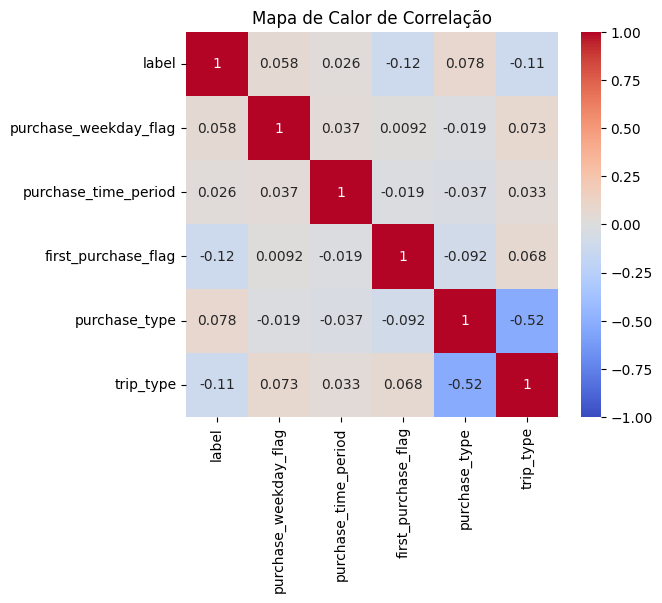

In [42]:
plt.figure(figsize=(6,5))
sns.heatmap(df_analise.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Mapa de Calor de Correlação")
plt.show()


In [43]:
# Definindo X e y
X = df_analise.drop("label", axis=1)
y = df_analise["label"]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4000, 5), (1000, 5), (4000,), (1000,))

In [47]:
# Step 4: Create and train the first basic XGBoost model
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [48]:
# Step 5: Make predictions
y_pred = model.predict(X_test)

In [49]:
# Step 6: Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.61      0.46      0.52       521
           1       0.53      0.67      0.60       479

    accuracy                           0.56      1000
   macro avg       0.57      0.57      0.56      1000
weighted avg       0.57      0.56      0.56      1000



In [50]:
PARAMETERS = {"subsample":[0.5, 0.75, 1],
"colsample_bytree":[0.5, 0.75, 1],
"max_depth":[2, 6, 12],
"min_child_weight":[1,5,15],
"learning_rate":[0.3, 0.1, 0.03],
"n_estimators":[100]}

In [51]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(n_estimators=100, n_jobs=-1, eval_metric='error')
"""Initialise Grid Search Model to inherit from the XGBoost Model,
set the of cross validations to 3 per combination and use accuracy
to score the models."""
model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=3,scoring="accuracy")

In [52]:
model_gs.fit(X_train,y_train)
print(model_gs.best_params_)

{'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 12, 'min_child_weight': 15, 'n_estimators': 100, 'subsample': 0.5}


In [54]:
#Initialise model using best parameters
model = XGBClassifier(objective="binary:logistic",subsample=0.5,
colsample_bytree=1,
min_child_weight=15,
max_depth=12,
learning_rate=0.3,
n_estimators=100)
#Fit the model but stop early if there has been no reduction in error after 10 epochs.
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.68697
[1]	validation_0-logloss:0.68322
[2]	validation_0-logloss:0.68203
[3]	validation_0-logloss:0.67900
[4]	validation_0-logloss:0.67873
[5]	validation_0-logloss:0.67967
[6]	validation_0-logloss:0.67813
[7]	validation_0-logloss:0.67762
[8]	validation_0-logloss:0.67711
[9]	validation_0-logloss:0.67707
[10]	validation_0-logloss:0.67722
[11]	validation_0-logloss:0.67683
[12]	validation_0-logloss:0.67767
[13]	validation_0-logloss:0.67815
[14]	validation_0-logloss:0.67830
[15]	validation_0-logloss:0.67837
[16]	validation_0-logloss:0.67875
[17]	validation_0-logloss:0.67793
[18]	validation_0-logloss:0.67770
[19]	validation_0-logloss:0.67867
[20]	validation_0-logloss:0.67724
[21]	validation_0-logloss:0.67671
[22]	validation_0-logloss:0.67735
[23]	validation_0-logloss:0.67712
[24]	validation_0-logloss:0.67836
[25]	validation_0-logloss:0.67761
[26]	validation_0-logloss:0.67636
[27]	validation_0-logloss:0.67697
[28]	validation_0-logloss:0.67701
[29]	validation_0-loglos

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [37]:

model = XGBClassifier(
    objective="binary:logistic",
    subsample=1,
    colsample_bytree=1,
    min_child_weight=1,
    max_depth=2,
    learning_rate=0.3,
    n_estimators=100,
    eval_metric="logloss"   # <-- aqui, no construtor
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)


[0]	validation_0-logloss:0.52476
[1]	validation_0-logloss:0.52085
[2]	validation_0-logloss:0.51850
[3]	validation_0-logloss:0.51727
[4]	validation_0-logloss:0.51648
[5]	validation_0-logloss:0.51591
[6]	validation_0-logloss:0.51553
[7]	validation_0-logloss:0.51533
[8]	validation_0-logloss:0.51514
[9]	validation_0-logloss:0.51505
[10]	validation_0-logloss:0.51499
[11]	validation_0-logloss:0.51494
[12]	validation_0-logloss:0.51491
[13]	validation_0-logloss:0.51489
[14]	validation_0-logloss:0.51486
[15]	validation_0-logloss:0.51485
[16]	validation_0-logloss:0.51484
[17]	validation_0-logloss:0.51483
[18]	validation_0-logloss:0.51481
[19]	validation_0-logloss:0.51481
[20]	validation_0-logloss:0.51481
[21]	validation_0-logloss:0.51480
[22]	validation_0-logloss:0.51480
[23]	validation_0-logloss:0.51479
[24]	validation_0-logloss:0.51479
[25]	validation_0-logloss:0.51479
[26]	validation_0-logloss:0.51477
[27]	validation_0-logloss:0.51477
[28]	validation_0-logloss:0.51477
[29]	validation_0-loglos

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [55]:
def model_eval(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))

train_predictions = model.predict(X_train)
model_eval(y_train, train_predictions)

Accuracy: 0.57675
              precision    recall  f1-score   support

           0       0.60      0.46      0.52      1986
           1       0.57      0.69      0.62      2014

    accuracy                           0.58      4000
   macro avg       0.58      0.58      0.57      4000
weighted avg       0.58      0.58      0.57      4000



In [56]:
params = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              'reg_alpha' : [0.1,0.001,.00001],
              'reg_lambda': [0.1,0.001,.00001]
                     
              }

In [57]:
xgbclf = XGBClassifier(n_estimators=100, n_jobs=-1, objective="binary:logistic",
    use_label_encoder=False,
    eval_metric="logloss")

In [58]:
from sklearn.model_selection import RandomizedSearchCV

# RandomizedSearchCV
clf = RandomizedSearchCV(
    estimator=xgbclf,
    param_distributions=params,
    scoring="accuracy",
    n_iter=25,
    n_jobs=4,
    cv=5,
    verbose=1,
    random_state=42
)

# Rodar a busca
clf.fit(X_train, y_train)

print("Melhores parâmetros:", clf.best_params_)
print("Melhor score:", clf.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Melhores parâmetros: {'subsample': np.float64(0.6), 'reg_lambda': 0.1, 'reg_alpha': 1e-05, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': np.float64(0.7), 'colsample_bylevel': np.float64(0.7)}
Melhor score: 0.5715


d:\Faculdade\click_predict\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:21:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
#Initialise model using best parameters from randomized cv
model_new_hyper = XGBClassifier(
                                subsample=0.6,
reg_alpha=0.00001,  # L1 regularization (Lasso)
reg_lambda=0.1,  # L2 regularization (Ridge)
colsample_bytree=0.7,
colsample_bylevel=0.7,
min_child_weight=1,
max_depth=6,
learning_rate=0.1,
n_estimators=100,
#scale_pos_weight=3.47,
tree_method="hist",
random_state=42)
#Fit the model but stop early if there has been no reduction in error after 10 epochs.
model_new_hyper.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

In [60]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score,
    average_precision_score, classification_report, confusion_matrix
)

y_proba = model_new_hyper.predict_proba(X_test)[:, 1]
y_pred  = model_new_hyper.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("PR AUC (Average Precision):", average_precision_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.566
Balanced accuracy: 0.5705344227216811
ROC AUC: 0.5989024639464015
PR AUC (Average Precision): 0.5477955213157417

Classification report:
               precision    recall  f1-score   support

           0     0.6101    0.4626    0.5262       521
           1     0.5372    0.6785    0.5996       479

    accuracy                         0.5660      1000
   macro avg     0.5737    0.5705    0.5629      1000
weighted avg     0.5752    0.5660    0.5614      1000

Confusion matrix:
 [[241 280]
 [154 325]]


In [61]:
from sklearn.metrics import f1_score

ths = np.linspace(0.05, 0.95, 19)
f1s = [f1_score(y_test, (y_proba >= t).astype(int), pos_label=1) for t in ths]
best_t = ths[int(np.argmax(f1s))]

print(f"Melhor threshold p/ F1 da classe 1: {best_t:.3f}  |  F1={max(f1s):.4f}")

y_pred_t = (y_proba >= best_t).astype(int)
print("\nReport no threshold ótimo:\n", classification_report(y_test, y_pred_t, digits=4))
print("Matriz (threshold ótimo):\n", confusion_matrix(y_test, y_pred_t))


Melhor threshold p/ F1 da classe 1: 0.200  |  F1=0.6543

Report no threshold ótimo:
               precision    recall  f1-score   support

           0     0.8519    0.0441    0.0839       521
           1     0.4882    0.9916    0.6543       479

    accuracy                         0.4980      1000
   macro avg     0.6700    0.5179    0.3691      1000
weighted avg     0.6777    0.4980    0.3571      1000

Matriz (threshold ótimo):
 [[ 23 498]
 [  4 475]]


In [62]:
hist = model_new_hyper.evals_result()  # {'validation_0': {'auc': [...], 'logloss': [...]}, 'validation_1': {...}}
for split, metrics in hist.items():
    for m, vals in metrics.items():
        print(f"{split} | {m}  ->  última: {vals[-1]:.6f}  (épocas: {len(vals)})")


validation_0 | logloss  ->  última: 0.677640  (épocas: 100)


In [63]:
import pandas as pd

booster = model_new_hyper.get_booster()
gain = booster.get_score(importance_type="gain")   # ganho médio da divisão
cover = booster.get_score(importance_type="cover") # cobertura
weight = booster.get_score(importance_type="weight") # nº de vezes usada

# monta um DF ordenado por ganho
all_feats = set(gain)|set(cover)|set(weight)
rows = []
for f in all_feats:
    rows.append({
        "feature": f,
        "gain": gain.get(f, 0),
        "cover": cover.get(f, 0),
        "weight": weight.get(f, 0)
    })
fi = pd.DataFrame(rows).sort_values("gain", ascending=False)

# tenta trocar f0,f1,... pelos nomes reais (se disponíveis)
try:
    name_map = {f"f{i}": name for i, name in enumerate(model_new_hyper.feature_names_in_)}
    fi["feature"] = fi["feature"].map(lambda x: name_map.get(x, x))
except AttributeError:
    pass

print(fi.head(20))


                 feature      gain       cover  weight
4    first_purchase_flag  1.905865  307.054443   108.0
1              trip_type  1.823460  248.410828   101.0
0  purchase_weekday_flag  1.032572  225.418015   140.0
3          purchase_type  0.991001  271.087921    97.0
2   purchase_time_period  0.652913  207.934555   295.0


In [64]:
import pandas as pd
cv_df = pd.DataFrame(clf.cv_results_)
cols = ["mean_test_score", "std_test_score", "rank_test_score"] + [c for c in cv_df.columns if c.startswith("param_")]
print(cv_df[cols].sort_values("rank_test_score").head(10))
print("Melhores parâmetros:", clf.best_params_)
print("Melhor score (CV):", clf.best_score_)


    mean_test_score  std_test_score  rank_test_score  param_subsample  \
8           0.57150        0.008269                1              0.6   
24          0.57150        0.010851                1              0.7   
20          0.57000        0.011859                3              0.9   
11          0.56975        0.008993                4              0.5   
10          0.56950        0.011953                5              0.8   
0           0.56900        0.012384                6              0.5   
7           0.56850        0.012232                7              0.8   
23          0.56825        0.011635                8              0.8   
3           0.56750        0.013919                9              0.6   
17          0.56725        0.010966               10              0.5   

    param_reg_lambda  param_reg_alpha  param_n_estimators  param_max_depth  \
8            0.10000          0.00001                 100                6   
24           0.00100          0.00100   

In [65]:
import numpy as np
import pandas as pd

client_id = df['client_id']

# 1) Probabilidades e rótulos
p_train = model_new_hyper.predict_proba(X_train)[:, 1]
p_test  = model_new_hyper.predict_proba(X_test)[:, 1]

# se quiser usar threshold customizado (ex.: 0.30):
threshold = 0.30
yhat_train = (p_train >= threshold).astype(int)
yhat_test  = (p_test  >= threshold).astype(int)

# 2) Monta DataFrames (mantém índice se X_* for DataFrame)
train_df = pd.DataFrame({
    "client_id": client_id,
    "set": "train",
    "y_true": np.asarray(y_train),
    "y_pred": yhat_train,
    "y_proba": p_train
}, index=getattr(X_train, "index", None))

test_df = pd.DataFrame({
    "client_id": client_id,
    "set": "test",
    "y_true": np.asarray(y_test),
    "y_pred": yhat_test,
    "y_proba": p_test
}, index=getattr(X_test, "index", None))

preds = pd.concat([train_df, test_df], axis=0)

# 3A) Salvar em CSV (tamanho maior)
preds.to_csv("predicoes_train_test.csv", index=True)

# 3B) OU salvar em Parquet (recomendado p/ volume grande)
#   requer pyarrow (pip install pyarrow)
#preds.to_parquet("predicoes_train_test.parquet", index=True)


In [66]:
import shap

ModuleNotFoundError: No module named 'shap'

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [3]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model_new_hyper)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

NameError: name 'model_new_hyper' is not defined